# Lab 09 - Radiation Shielding (Part 1) - Make-Up Submission

Edit this cell and provide the information requested:

- Your name:
- Your student number:

In [1]:
%reset -f
import numpy as np
import data_entry2
import matplotlib.pyplot as plt

## Familiarize Part 1
### Experimental Goal

Find the radiation attenuation coefficient, μ, for low-energy gamma rays attenuated by shielding. This will allow you to predict how much material would be needed to reduce the radiation count-rate by a specific factor

### Equipment

- Radioactive Source:  Iron-55 emits low-energy gamma rays (5.9 keV). Source ID: Fe-55-01
- Geiger Counter: Counts the number of particles that interact with the detector. Counting apparatus is set to "Geiger Counter" and 450 V. The source-detector distance is set to 1.0 cm (on the ruler) and left at that distance throughout the lab.
- Paper Shielding Sheets: paper sheets of the same thickness used to attenuate the x-rays. Both single sheets and “5-packs” are available.
- Timer (stopwatch): Recorded actual measurement times in spreadsheet (the times entered into the spreadsheet also include fractions of a second)

## Familiarize Part 2
### Variables and Model
A reasonable model for the count-rate of x-rays (or gamma rays) emitted from the source and detected by the detector is $R(x) = R_0 e^{-\mu x}$. where x is the thickness of the paper (number of sheets of paper), μ is the attenuation coefficient, and R(x) is the count-rate for that thickness of shielding.
- in python we denote $e^{-\mu x}$ as np.exp(-mu*x)
- We will adjust two parameters, $R_0$ and μ, to minimize chi-squared.


## Familiarize Part 3
### Uncertainty

Radioactive decays are random processes which follow a Poisson distribution, where if we count N events, the uncertainty is $u_N = \sqrt{N}$. This is so that our measurements can be compared, independent of the time for which we count (t), we will convert our measurements from counts (N) to count-rates (R = N/t), $u_R = R\sqrt{\frac{1}{N} + (\frac{u_t}{t})^2}$

## Familiarize Part 4
### Measurement Planning

#### Intitial Obersevational Measurements: 
- With t=60 seconds with 0 sheets, the count was 1270 Counts/seconds. When t=120 seconds with 0 sheets, the count was 2463 Counts/second. 
- With t=60 seconds with 2 sheets, the count was 574 Counts/seconds. Wnen t=120 seconds with 2 sheets, the count was 1128 Counts/second. 
- With t=60 seconds with 10 sheets, the count was 29 Counts/seconds. Wnen t=120 seconds with 10 sheets, the count was 60 Counts/second. 
- With t=60 seconds with 25 sheets, the count was 10 Counts/seconds. When t=120 seconds with 2 sheets, the count was 20 Counts/second.

#### Measrement Plan and Justification:
I have decided to do 6 measurements strarting from 0 to 10 sheets (increasing sheets by 2). This is because during my observation, I noticed that the value for count was derastically different as the number of sheets increased. I also decided that each measurement will be 360 seconds (6 minutes) long. From my observation, I noticed that the longer I left the timer for, the higher the value of count. Therefore for a better uncerstanding of the decrease in count when sheets are increased, I decided to do 360 seconds (a time period long enough to let the count value increase and just enough for me to be able to perform multiple measurements).

#### Measurement Steps
1. Open the stimulation and select insert source.
2. Insert the number of sheets for data collection
3. Press "Start counting" button to start measuring count and time.
4. After 360 seconds has passed press "Stop Counting" box.
5. Collect the Count number as well as amount of seconds waited.
6. Press "Reset Count" and repeat steps 2 to 6 until you reach the desired number of sheets

## Data Collection

In [2]:
de = data_entry2.sheet("lab9_data1.csv")

Sheet name: lab9_data1.csv


## Analysis

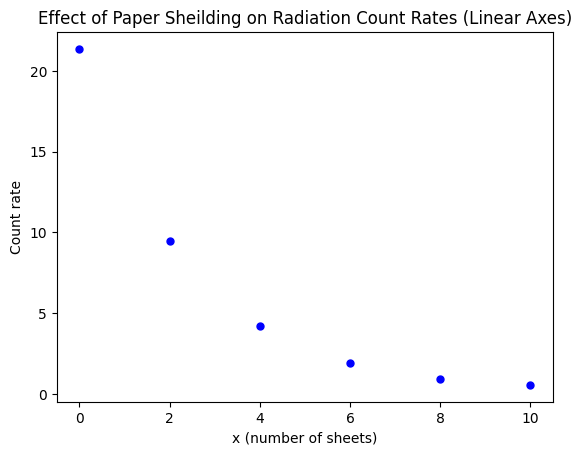

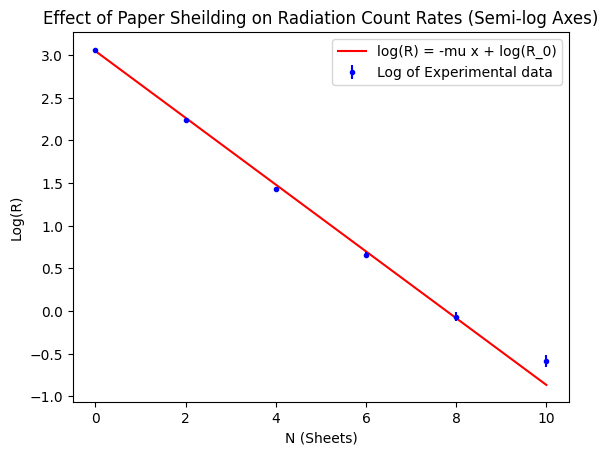

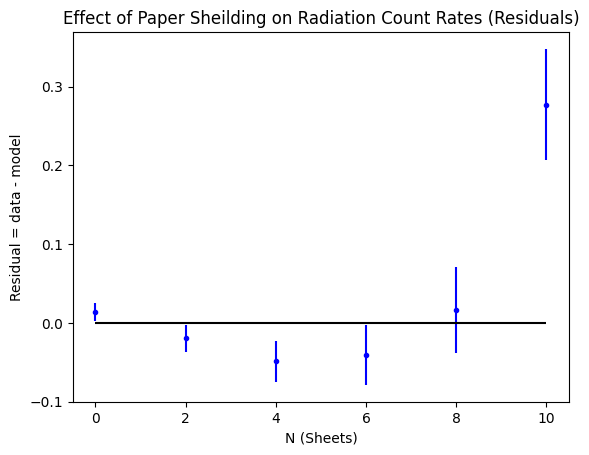

Chi-squared: 5.747665566958362


In [3]:
uNVec = np.sqrt(NVec)
RateVec = NVec/tVec
Ntrials = len(tVec)
tave = np.mean(tVec)
utVec = utave = np.std(tVec,  ddof=1)/np.sqrt(Ntrials)

uRateVec = RateVec * np.sqrt(1/NVec + (utVec/tVec)**2)
logRateVec = np.log(RateVec)
ulogRateVec = uRateVec/RateVec


## Linear-linear plot
plt.plot(xVec, RateVec, "bo", markersize=5)
plt.title("Effect of Paper Sheilding on Radiation Count Rates (Linear Axes)")
plt.xlabel("x (number of sheets)")
plt.ylabel("Count rate")
plt.show()

## Semi-Ln plot
yVec = logRateVec
uyVec = ulogRateVec

# DATA/MODEL PLOT
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the linear model values
#################### MODIFY THE MODEL PARAMETERS HERE #########################
slope = -0.3912428212786768  # Estimate of the slope m
intercept = 3.0476101845481045 # Estimate of the intercept b
###############################################################################
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Effect of Paper Sheilding on Radiation Count Rates (Semi-log Axes)")
plt.xlabel("N (Sheets)")
plt.ylabel("Log(R)")
plt.legend()
plt.show()

# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Effect of Paper Sheilding on Radiation Count Rates (Residuals)")
plt.xlabel("N (Sheets)")
plt.ylabel("Residual = data - model")
plt.show()


# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared:", chisquared)

## Uncertainty Calculations

In [4]:
A = np.sum(1/uyVec**2)
B = np.sum(xVec*yVec/uyVec**2)
C = np.sum(xVec/uyVec**2)
D = np.sum(yVec/uyVec**2)
E = np.sum(xVec**2/uyVec**2)
Z = A * E - C**2

m  = ((A*B)-(C*D))/Z
um = np.sqrt(A / Z)
b  = ((D*E)-(B*C))/Z
ub = np.sqrt(E/Z)

print("Slope ± uncertainty =", m, "Counts/second ±",um)
print("Intervept ± uncertainty =", b, "±",ub)

Slope ± uncertainty = -0.3912428212786768 Counts/second ± 0.0037714248560646708
Intervept ± uncertainty = 3.0476101845481045 ± 0.010359930973604062


## Value of $R_0$ and $\mu$

In [5]:
R_0 = np.exp(b)
u_R_0 = ub*(np.exp(b))
mu = -m 
u_m = um

print("R_0 ± uncertainty =", R_0, "Counts/second ±",u_R_0)
print("μ ± uncertainty =", mu, "±",u_m)

R_0 ± uncertainty = 21.064942895329633 Counts/second ± 0.21823135435852628
μ ± uncertainty = 0.3912428212786768 ± 0.0037714248560646708


# Improvement Round

Decided to decrease time from 360 seconds to 180 (3 minutes). This is to see if having a decrease in t will result in more accurate result. Initial round of observation had a chi-squared value of around 5. By decreasing the t in this new round of measurements I'm aiming to see if this change will have a more accurate result. I have also decided to increase the number of sheets so that I will have more data points. 

## Data Collection (Improvement Round)

In [6]:
de = data_entry2.sheet("lab9_data2.csv")

Sheet name: lab9_data2.csv


## Analysis (Improvement Round)

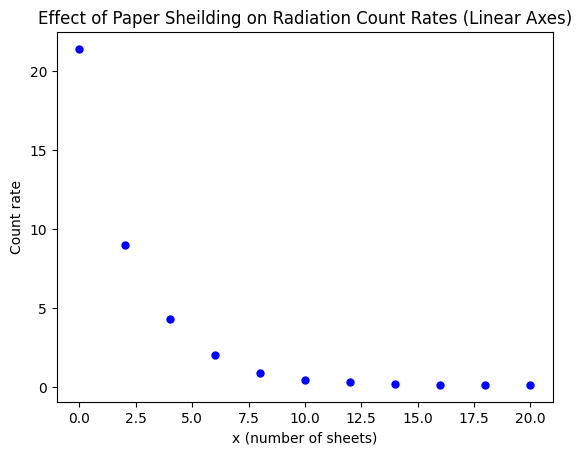

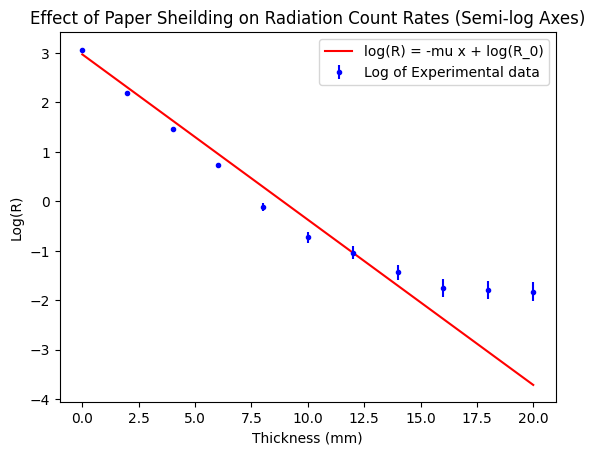

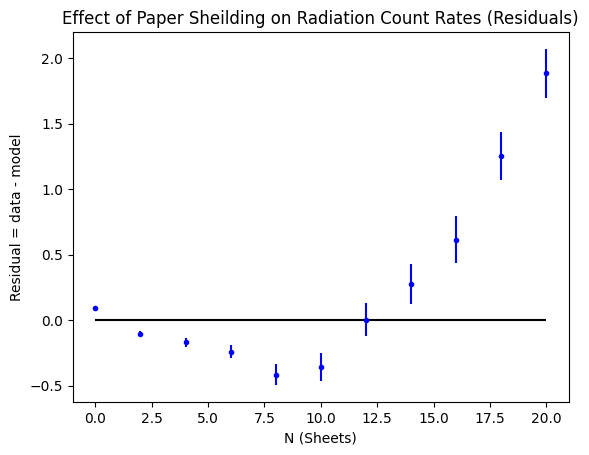

Chi-squared: 33.268746516290534


In [7]:
uNVec = np.sqrt(NVec)
RateVec = NVec/tVec
Ntrials = len(tVec)
tave = np.mean(tVec)
utVec = utave = np.std(tVec,  ddof=1)/np.sqrt(Ntrials)

uRateVec = RateVec * np.sqrt(1/NVec + (utVec/tVec)**2)
logRateVec = np.log(RateVec)
ulogRateVec = uRateVec/RateVec


## Linear-linear plot
plt.plot(xVec, RateVec, "bo", markersize=5)
plt.title("Effect of Paper Sheilding on Radiation Count Rates (Linear Axes)")
plt.xlabel("x (number of sheets)")
plt.ylabel("Count rate")
plt.show()

## Semi-Ln plot
yVec = logRateVec
uyVec = ulogRateVec

# DATA/MODEL PLOT
# Step 1: find the limits of the data:
xmin = np.min(xVec) # use the np.min function to find the smallest x value
xmax = np.max(xVec) # same for max
#print (xmin, xmax)  # uncomment to see what the limits are

# Step 2: generate a bunch of x points between xmin and xmax
xpoints = np.linspace(xmin, xmax, 200) # gives 200 evenly spaced points between xmin and xmax
#print(xpoints) # uncomment to see the x values that were generated.

# Step 3: calculate the linear model values
#################### MODIFY THE MODEL PARAMETERS HERE #########################
slope = -0.33396567278214073  # Estimate of the slope m
intercept = 2.9692492922987292 # Estimate of the intercept b
###############################################################################
ypoints = xpoints * slope + intercept # this calculates the yvalues at all 200 points

# Step 4: plot the curve. We plot this as a red line "r-" :
plt.plot(xpoints, ypoints, "r-", label = "log(R) = -mu x + log(R_0)")

# What's below is exactly what we had earlier:
plt.errorbar(xVec, logRateVec, ulogRateVec, fmt="bo", markersize=3, label="Log of Experimental data")
plt.title("Effect of Paper Sheilding on Radiation Count Rates (Semi-log Axes)")
plt.xlabel("Thickness (mm)")
plt.ylabel("Log(R)")
plt.legend()
plt.show()

# RESIDUALS PLOT
# Step 1: Calculate the model at each x-datapoint
ymodel = xVec * slope + intercept

# Step 2: Calculate the residual vector
resVec = logRateVec - ymodel

# Step 3: Plot the residual vector against the x-data vector
plt.errorbar(xVec, resVec, ulogRateVec, fmt="bo", markersize = 3)

# Step 4: Add a R = 0 x-axis (horizontal line) to the plot
plt.hlines(y=0, xmin=xmin, xmax=xmax, color='k') # draw axis at y = 0.

# Add axis labels and title, and show the graph
plt.title("Effect of Paper Sheilding on Radiation Count Rates (Residuals)")
plt.xlabel("N (Sheets)")
plt.ylabel("Residual = data - model")
plt.show()


# CHI-SQUARED CALCULATION
N = len(xVec)
P = 2  # 2 parameters; slope and intercept
weightedsquaredresVec = (resVec/ulogRateVec)**2
chisquared = np.sum(weightedsquaredresVec)/(N-P)
print("Chi-squared:", chisquared)

## Uncertainty Calculations (Improvement Round)

In [8]:
A = np.sum(1/uyVec**2)
B = np.sum(xVec*yVec/uyVec**2)
C = np.sum(xVec/uyVec**2)
D = np.sum(yVec/uyVec**2)
E = np.sum(xVec**2/uyVec**2)
Z = A * E - C**2

m  = ((A*B)-(C*D))/Z
um = np.sqrt(A / Z)
b  = ((D*E)-(B*C))/Z
ub = np.sqrt(E/Z)

print("Slope ± uncertainty =", m, "Counts/second ±",um)
print("Intervept ± uncertainty =", b, "±",ub)

Slope ± uncertainty = -0.33396567278214073 Counts/second ± 0.003738957977518268
Intervept ± uncertainty = 2.9692492922987292 ± 0.013935354141872186


## Value of $R_0$ and $\mu$ (Improvement Round)

In [9]:
R_0 = np.exp(b)
u_R_0 = ub*(np.exp(b))
mu = -m 
u_m = um

print("R_0 ± uncertainty =", R_0, "Counts/second ±",u_R_0)
print("μ ± uncertainty =", mu, "±",u_m)

R_0 ± uncertainty = 19.477292352956784 Counts/second ± 0.2714229666632318
μ ± uncertainty = 0.33396567278214073 ± 0.003738957977518268


# Results and Summary

### Report your model with relevant uncertainties, and other findings.

#### Results (First Round)
- Chi-squared value = 5.750
- Calculated Slope ± uncertainty of model = -0.391 ± $3.771*10^{-3}$ Counts/second
- Calculated Intervept ± uncertaintyof model  = 3.048 ± $1.036*10^{-2}$ 
- $R_0$ ± uncertainty = 21.06 ± 0.218 Counts/second
- μ ± uncertainty = 0.391 ± $3.771*10^{-3}$

#### Results (Second Round)
- Chi-squared value = 33.27
- Calculated Slope ± uncertainty of model = -0.334 ± $3.738*10^{-3}$ Counts/second
- Calculated Intervept ± uncertainty of model = 2.969 ± $1.393*10^{-2}$
- $R_0$ ± uncertainty = 19.48 ± 0.271 Counts/second
- μ ± uncertainty = 0.334 ± $3.739*10^{-4}$

Chi-squared value in both rounds of analysis is too high (>1). This means that the uncertainty in both rounds of analysis was underestimated. This result is expected since the shape of the plot is more exponential rather than linear therefore it is more difficult to find a linear model that fits the data

### How well does the model describe the data?
Not well. Even after a change in measurement strategy, since the data is not linear (more exponential/hockey-stick shaped), the model does not descript the data well. This can also be seen in the values of chi-squared, 5.750 for first round and 33.27 for second round, both much bigger than the desired chi-squared value 1. 


### Does it describe the entire data set well or only a certain region?
Only a certain region of the dataset is not described well by the model. After 8 sheets, the data starts becoming more exponetial shaped instead linear. From 10 sheets, the model does not describe the data well.

### Experimental goal

The radiation attenuation coefficient, μ, for low-energy gamma rays attenuated by shielding is 0.334 ± $3.739*10^{-4}$ in first round and 0.391 ± $3.771*10^{-3}$ in the second round of data collection.

### Comparison with others with others
My first round result were very similar to Brandon's results. We both got similar values for slope, his was -0.3898 ± $6.32*10^{-3}$ "Counts/second while mine was -0.391 ± $3.771*10^{-3}$ "Counts/second. Our y-intercepts were also similar. He got 3.0628 ± $2.07*10^{-2}$ while I got 3.048 ± $1.036*10^{-2}$. My second round of results was similar to Tarynn's. For slope I got -0.334 ± $3.738*10^{-3}$ "Counts/second and he got 0.340 ± $2.542*10^{-2}$ "Counts/second. For our intercepts, I got 2.969 ± $1.393*10^{-2}$ and he got 2.878 ± $1.542*10^{-2}$. Over all my results was similar to other's results in terms of slope and intercept calculations.

# Submit

Steps for submission:

1. Click: Run => Run_All_Cells
2. Read through the notebook to ensure all the cells executed correctly and without error.
3. File => Save_and_Export_Notebook_As->HTML
4. Inspect your html file
5. Upload the HTML document to the lab submission assignment on Canvas.

In [10]:
display_sheets()

Sheet: de   File: lab9_data2.csv


,N,t,x
Units,Count,s,Sheets
0,3854,180,0
1,1618,180,2
2,779,180,4
3,372,180,6
4,160,180,8
5,87,180,10
6,64,180,12
7,43,180,14
8,31,180,16
